In [189]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS


In [125]:
df =  pd.read_csv('winemag-data_first150k.csv')
df = df.drop(columns='Unnamed: 0')

In [126]:
df_2 =  pd.read_csv('winemag-data-130k-v2.csv')
df_2 = df_2.drop(columns='Unnamed: 0')

In [127]:
df = df.merge(df_2,how='outer')
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234663,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
234664,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
234665,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
234666,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234668 entries, 0 to 234667
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                234602 non-null  object 
 1   description            234668 non-null  object 
 2   designation            165151 non-null  object 
 3   points                 234668 non-null  int64  
 4   price                  216150 non-null  float64
 5   province               234602 non-null  object 
 6   region_1               195693 non-null  object 
 7   region_2               93236 non-null   object 
 8   variety                234667 non-null  object 
 9   winery                 234668 non-null  object 
 10  taster_name            116131 non-null  object 
 11  taster_twitter_handle  110642 non-null  object 
 12  title                  151122 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 15.2+ MB


Podemos apreciar que tenemos una gran cantidad de datos, en algunas columnas apreciamos una gran cantidad de nan, debido al tipo de visualización que queremos realizar, las columnas taster_name, taster_twitter_handle,region_1 y region_2.

Las columnas title y designation tambien las eliminaremos debido a la gran cantidad de NaN que contienen.

In [129]:
df = df.drop(columns=['taster_name','taster_twitter_handle','region_1','region_2','title','designation'])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234668 entries, 0 to 234667
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      234602 non-null  object 
 1   description  234668 non-null  object 
 2   points       234668 non-null  int64  
 3   price        216150 non-null  float64
 4   province     234602 non-null  object 
 5   variety      234667 non-null  object 
 6   winery       234668 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.8+ MB


Comprobamos los NaN en las columnas restantes.

In [131]:
df[df['country'].isna()]

,country,description,points,price,province,variety,winery
1358,NaN,Delicate white flowers and a spin of lemon pee...,90,17.0,NaN,Assyrtiko,Tsililis
1723,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",90,30.0,NaN,Red Blend,Büyülübağ
105598,NaN,"From first sniff to last, the nose never makes...",81,15.0,NaN,Pinot Noir,Chilcas
105599,NaN,"From first sniff to last, the nose never makes...",81,15.0,NaN,Pinot Noir,Chilcas
105600,NaN,"From first sniff to last, the nose never makes...",81,15.0,NaN,Pinot Noir,Chilcas
...,...,...,...,...,...,...,...
229805,NaN,"Cigar box, cedar and red fruit aromas start th...",90,27.0,NaN,Tsapournakos,Ktima Voyatzi
231654,NaN,This Swiss red blend is composed of four varie...,90,30.0,NaN,Red Blend,Les Frères Dutruy
234356,NaN,Dry spicy aromas of dusty plum and tomato add ...,89,22.0,NaN,Cabernet Sauvignon,El Capricho
234357,NaN,El Capricho is one of Uruguay's more consisten...,89,22.0,NaN,Tempranillo,El Capricho


Vamos a averiguar el país y la provincina de nuestros nans gracias a la vineria

In [132]:
#Aplicamos una mascara y la guardamos en una variable y con el metodo unique, encontramos todas las vinerias.
pais_nan = df[df['country'].isna()]
pais_nan['winery'].unique()

array(['Tsililis', 'Büyülübağ', 'Chilcas', 'Gotsa Family Wines',
       'Barton & Guestier', 'Kakhetia Traditional Winemaking', 'Ross-idi',
       'Orbelus', 'St. Donat', 'Familia Deicas', 'Bartho Eksteen',
       'Stone Castle', 'Teliani Valley', 'Undurraga', 'Mt. Beautiful',
       'Neumeister', 'Bachelder', 'Santa Ema', 'Psagot', 'Newton Johnson',
       'Ktima Voyatzi', 'Lismore', 'Logodaj', 'Somlói Vándor',
       'Les Frères Dutruy', 'El Capricho', 'Amiran Vepkhvadze'],
      dtype=object)

Rellenamos los NaN para Grecia
Las vinerias provinientes de Grecia son: Tsililis, Ktima Voyazti

In [133]:
df[(df['winery']=='Tsililis')] = df[(df['winery']=='Tsililis')].fillna('Greece')

In [134]:
df[(df['winery']=='Ktima Voyatzi')] = df[(df['winery']=='Ktima Voyatzi')].fillna('Greece')

Rellenamos NaN para Túrquia

Las vinerias provinientes de Túrquia son: Büyülübag

In [135]:
df[(df['winery']=='Büyülübağ')] = df[(df['winery']=='Büyülübağ')].fillna('Turkey')

Rellenamos NaN para Chile


Las vinerias provinientes de Chile son: Chilcas, Undurraga, Santa Ema

In [136]:
df[(df['winery']=='Chilcas')] = df[(df['winery']=='Chilcas')].fillna('Chile')

In [137]:
df[(df['winery']=='Undurraga')] = df[(df['winery']=='Undurraga')].fillna('Chile')

In [138]:
df[(df['winery']=='Santa Ema')] = df[(df['winery']=='Santa Ema')].fillna('Chile')

Rellenamos los NaN para Georgia

Las vinerias provenientes de Georgia son: Gotsa Family Wines,Kakhetia Traditional Winemaking, Teliani Valley,Amiran Vepkhvadze

In [139]:
df[(df['winery']=='Gotsa Family Wines')] = df[(df['winery']=='Gotsa Family Wines')].fillna('Georgia')


In [140]:
df[(df['winery']=='Kakhetia Traditional Winemaking')] = df[(df['winery']=='Kakhetia Traditional Winemaking')].fillna('Georgia')

In [141]:
df[(df['winery']=='Teliani Valley')] = df[(df['winery']=='Teliani Valley')].fillna('Georgia')

In [142]:
df[(df['winery']=='Amiran Vepkhvadze')] = df[(df['winery']=='Amiran Vepkhvadze')].fillna('Georgia')

Rellenamos NaN para Francia

Las vinerias provinientes de Francia son: Barton & Guestier, St.Donat, Les Fréres Dutruy

In [143]:
df[(df['winery']=='Barton & Guestier')] = df[(df['winery']=='Barton & Guestier')].fillna('France')

In [144]:
df[(df['winery']=='St. Donat')] = df[(df['winery']=='St. Donat')].fillna('France')

In [145]:
df[(df['winery']=='Les Frères Dutruy')] = df[(df['winery']=='Les Frères Dutruy')].fillna('France')

Rellenamos NaN para Bulgaria

Las vinerias provenientes de Bulgaria son: Ross-Idi, Orbelus, Logodaj

In [146]:
df[(df['winery']=='Ross-idi')] = df[(df['winery']=='Ross-idi')].fillna('Bulgaria')

In [147]:
df[(df['winery']=='Orbelus')] = df[(df['winery']=='Orbelus')].fillna('Bulgaria')

In [148]:
df[(df['winery']=='Logodaj')] =df[(df['winery']=='Logodaj')].fillna('Bulgaria')

Rellenamos los NaN para Uruguay

Las vinerias provenientes de Uruguay son: Familia Deicas

In [149]:

df[(df['winery']=='Familia Deicas')] = df[(df['winery']=='Familia Deicas')].fillna('Uruguay')

Rellenamos NaN para Sudafrica

Las vinerias provenientes de Sudafrica son: Bartho Eksteen,Newton Johnson

In [150]:

df[(df['winery']=='Bartho Eksteen')] = df[(df['winery']=='Bartho Eksteen')].fillna('South Africa')

In [151]:
df[(df['winery']=='Newton Johnson')] = df[(df['winery']=='Newton Johnson')].fillna('South Africa')

Rellenamos NaN para Kosovo

Las vinerias provenientes de Kosovo son: Stone Castle

In [152]:
df[(df['winery']=='Stone Castle')] = df[(df['winery']=='Stone Castle')].fillna('Kosovo')

Rellenamos NaN para Nueva Zelanda

Las vinerias provenientes de Nueva Zelanda son: Mt Beautiful

In [153]:
df[(df['winery']=='Mt. Beautiful')] = df[(df['winery']=='Mt. Beautiful')].fillna('New Zealand')

Rellenamos NaN para Austria

Las vinerias provenientes de Austria: Neumeister

In [154]:
df[(df['winery']=='Neumeister')] = df[(df['winery']=='Neumeister')].fillna('Austria')

Rellenamos NaN para Canada

Las vinerias provenientes de Canada son: Bachelder

In [155]:
df[(df['winery']=='Bachelder')] = df[(df['winery']=='Bachelder')].fillna('Canada')

Rellenamos NaN para Israel

Las vinerias provenientes de Israel son: Psagot

In [156]:
df[(df['winery']=='Psagot')] = df[(df['winery']=='Psagot')].fillna('Israel')

Rellenamos NaN para Australia

Las vinerias provinientes de Australia son: Lismore

In [157]:
df[(df['winery']=='Lismore')] = df[(df['winery']=='Lismore')].fillna('Australia')

Rellenamos NaN para Hungría

Las vinerias provinientes de Hungría: Somlói Vándor

In [158]:
df[(df['winery']=='Somlói Vándor')] = df[(df['winery']=='Somlói Vándor')].fillna('Hungary')

Rellenamos NaN para España

Las vinerias provinientes de España son: El Capricho

In [159]:
df[(df['winery']=='El Capricho')] = df[(df['winery']=='El Capricho')].fillna('Spain')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234668 entries, 0 to 234667
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   country      234668 non-null  object
 1   description  234668 non-null  object
 2   points       234668 non-null  int64 
 3   price        216214 non-null  object
 4   province     234668 non-null  object
 5   variety      234667 non-null  object
 6   winery       234668 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.0+ MB


Miramos la cantididad de NaN que tenemos de precio

In [161]:
df[df['price'].isna()]


,country,description,points,price,province,variety,winery
35,Italy,"Underbrush, scorched earth, menthol and plum s...",90,NaN,Tuscany,Sangiovese,Abbadia Ardenga
62,France,"Delicious while also young and textured, this ...",90,NaN,Loire Valley,Sauvignon Blanc,Domaine Vacheron
63,France,"Delicious while also young and textured, this ...",90,NaN,Loire Valley,Sauvignon Blanc,Domaine Vacheron
92,Italy,"This offers aromas of red rose, wild berry, da...",91,NaN,Piedmont,Nebbiolo,Silvano Bolmida
93,Italy,"This offers aromas of red rose, wild berry, da...",91,NaN,Piedmont,Nebbiolo,Silvano Bolmida
...,...,...,...,...,...,...,...
234578,Italy,"Doga delle Clavule is a neutral, mineral-drive...",86,NaN,Tuscany,Sangiovese,Caparzo
234590,Portugal,This rich wine has a firm structure as well as...,90,NaN,Douro,Portuguese Red,Quinta da Pacheca
234593,Portugal,This mature wine that has 50% Touriga Nacional...,90,NaN,Dão,Portuguese Red,Seacampo
234617,Italy,"Aromas of passion fruit, hay and a vegetal not...",91,NaN,Veneto,Garganega,Le Mandolare


Eliminamos una serie de strings que se encontraban en la columna de precio

In [162]:
df = df[np.isfinite(pd.to_numeric(df.price, errors="coerce"))]

Al ser una gran cantidad de NaN y no haber forma de rellenarlos decido eliminarlos

In [163]:
df = df.dropna()


Hemos visto a la hora de hacer limpieza que existen filas duplicadas, procedemos a eliminarlas

In [164]:
#Usamos el metodo drop_duplicates, escojo descripción debido a que es la columna que no tiene valores unicos.
df=df.drop_duplicates('description')


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156629 entries, 0 to 234667
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   country      156629 non-null  object
 1   description  156629 non-null  object
 2   points       156629 non-null  int64 
 3   price        156629 non-null  object
 4   province     156629 non-null  object
 5   variety      156629 non-null  object
 6   winery       156629 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.0+ MB


Tenemos ya listo el el dataset para graficar!

Veamos como se distribuyen los puntos

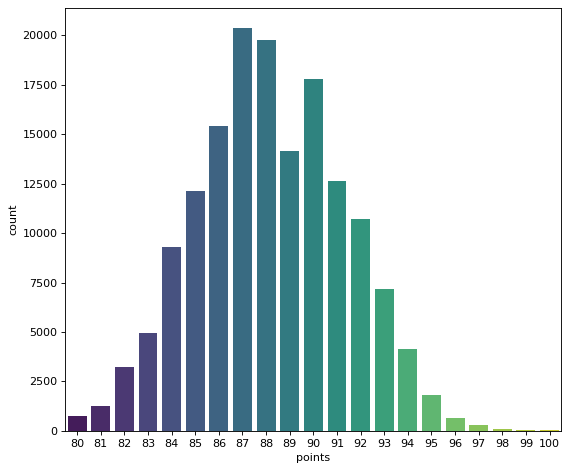

In [166]:

#Hacemos un countplot
figure(figsize=(8, 7),dpi=80)
ax = sns.countplot(x='points', data=df,palette='viridis')


El puntuaje más común son 87

(0.0, 500.0)

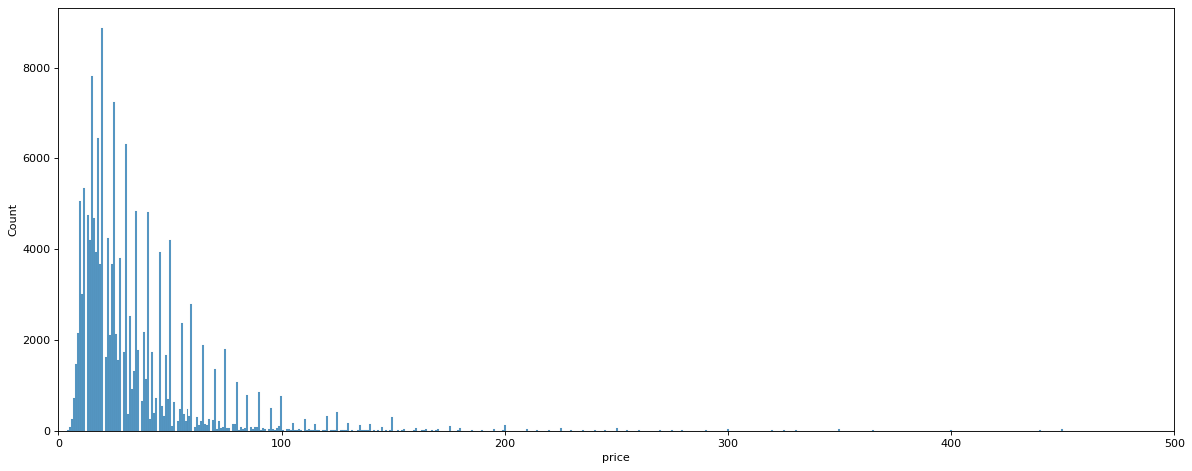

In [168]:
figure(figsize=(18, 7),dpi=80)
ax = sns.histplot(x='price', data=df,palette='viridis')
ax.set_xlim(0,500)

La gran mayoria de precios se concentran en el rango de 0 a 100 euros, el resto se distribuye sobre 100 y 500 euros

¿Que países puntuan mejor?


In [272]:
top_paises = df.groupby('country')['points'].mean().reset_index().sort_values('points',ascending=False)
top_paises = top_paises[0:10]

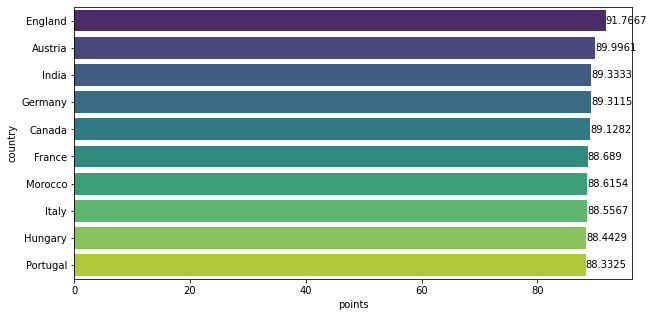

In [273]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'points', y = 'country', data = top_paises,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Y los peores?

In [281]:
bot_paises = df.groupby('country')['points'].mean().reset_index().sort_values('points',ascending=True)
bot_paises = bot_paises[:10]
bot_paises

,country,points
41,South Korea,81.500000
31,Montenegro,82.000000
34,Peru,83.562500
26,Lithuania,84.250000
47,Ukraine,84.294118
10,China,84.333333
6,Brazil,84.384615
38,Slovakia,84.500000
23,Japan,85.000000
29,Mexico,85.224719


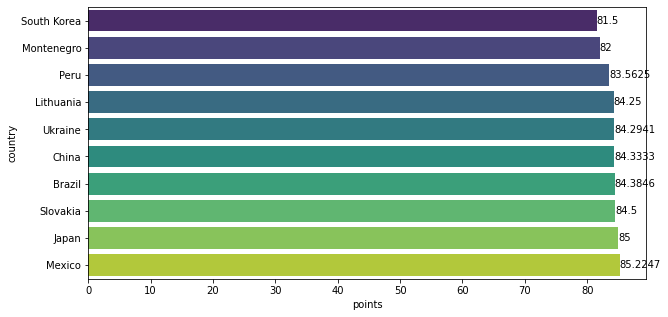

In [282]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'points', y = 'country', data = bot_paises,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Que paises hacen el vino mas caro de media?

In [283]:
vinos_mas_caros_media = df.groupby(['country'])['price'].mean().reset_index().sort_values('price',ascending=False)
vinos_mas_caros_media = vinos_mas_caros_media[:10]

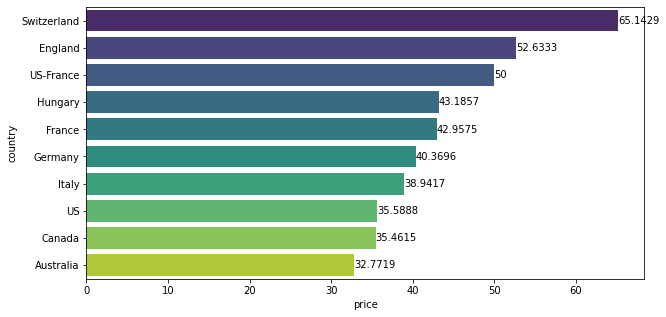

In [284]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'country', data = vinos_mas_caros_media,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Y el más barato?

In [285]:
vinos_mas_baratos_media = df.groupby(['country'])['price'].mean().reset_index().sort_values('price',ascending=True)
vinos_mas_baratos_media = vinos_mas_baratos_media[:10]

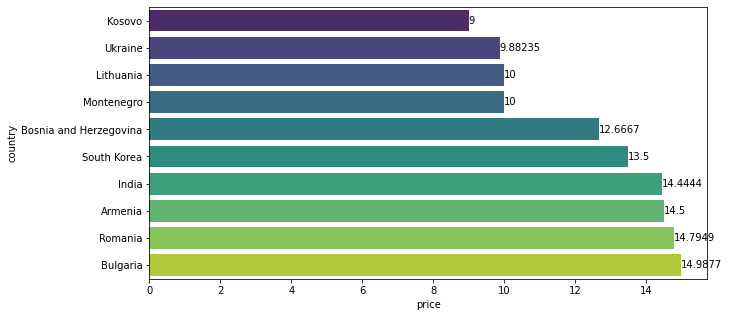

In [286]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'country', data = vinos_mas_baratos_media,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Que paises tienen la botella más cara y más barata?

In [169]:
#agrupamos los vinos mas caros
vinos_mas_caros = df.groupby(['country'])['price'].max().reset_index().sort_values('price',ascending=False)
vinos_mas_caros = vinos_mas_caros[:10]

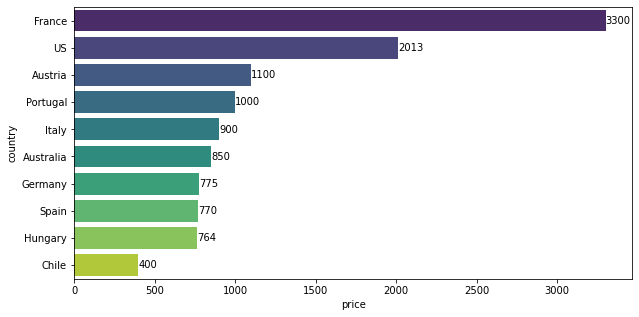

In [227]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'country', data = vinos_mas_caros,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Y cual tiene la más barata?

In [171]:
#agrupamos los vinos mas baratos
vinos_mas_baratos = df.groupby(['country'])['price'].min().reset_index().sort_values('price',ascending=True)
vinos_mas_baratos = vinos_mas_baratos[:10]

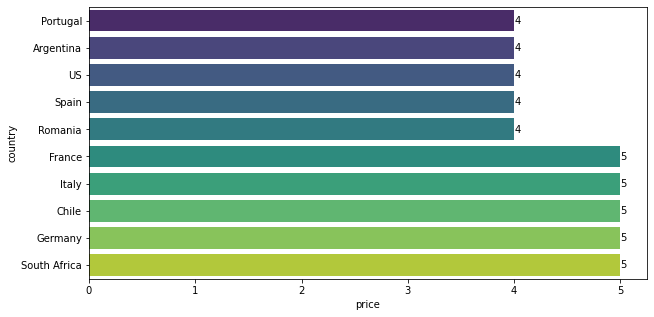

In [228]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'country', data = vinos_mas_baratos,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Que país produce más vinos?

In [173]:
pais_vinos_mas = df.groupby(['country']).count().reset_index().sort_values('price',ascending=False)
pais_vinos_mas = pais_vinos_mas[:10]

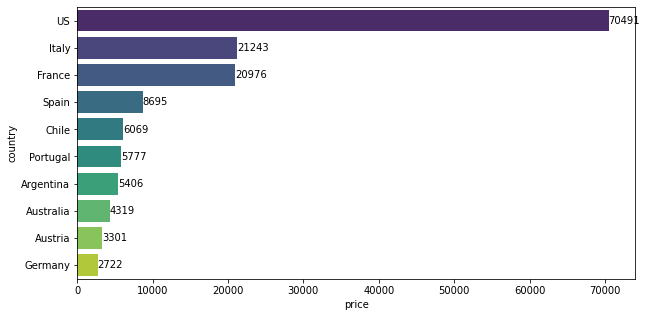

In [229]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'country', data = pais_vinos_mas,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Que palabras son las más usadas en las descripciones?

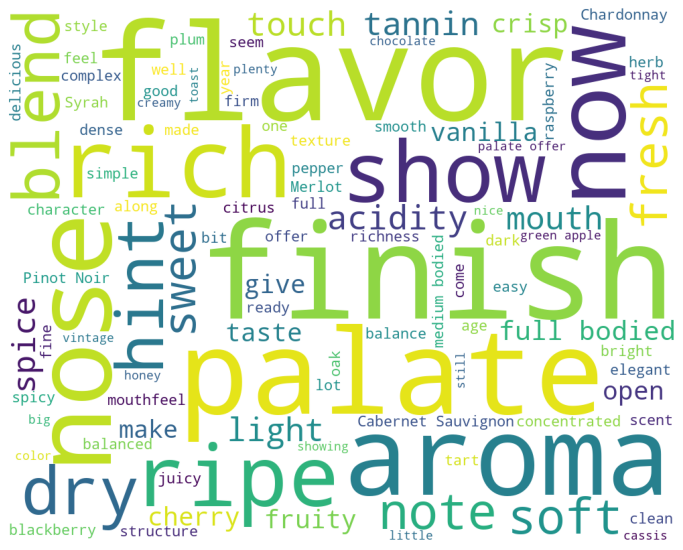

In [194]:
#Usamos wordcloud para sacar el mapa de palabras más usadas
stopwords = set(STOPWORDS)
newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=100,max_font_size=200, width=1000, height=800,).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

¿Que vinerias hace los vinos más caros?

In [255]:
vinerias_top = df.groupby('winery')[['price']].max().reset_index().sort_values('price',ascending=False)
vinerias_top = vinerias_top[0:10]


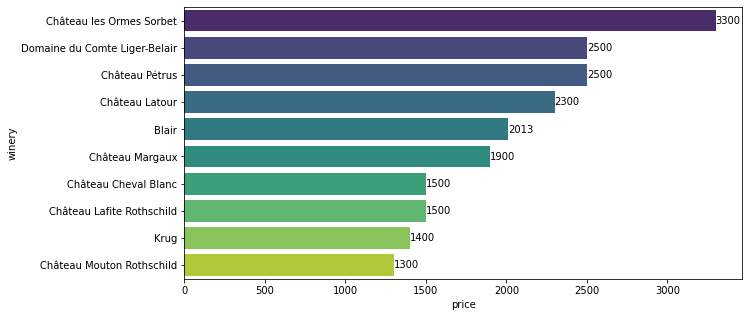

In [259]:

fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'winery', data = vinerias_top,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

¿Y cual los más baratos?

In [260]:
vinerias_low = df.groupby('winery')[['price']].min().reset_index().sort_values('price',ascending=False)
vinerias_low = vinerias_top[0:10]


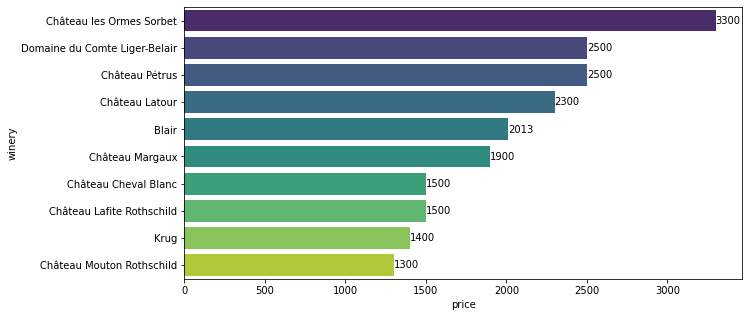

In [261]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'price', y = 'winery', data = vinerias_low,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()